In [3]:
import argparse as ap
import cv2
import imutils 
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt

from pylab import *
from PIL import Image
from rootsift import RootSIFT


In [4]:
image_path = "Dataset/100.jpg"

In [5]:
im_features, image_paths, idf, numWords, voc = joblib.load("bof2.pkl")

In [6]:
des_list = []
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
des_list.append((image_path, descs))

In [7]:
descriptors = des_list[0][1]

In [8]:
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

In [10]:
print(len(image_paths))

1000


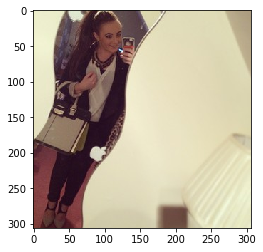

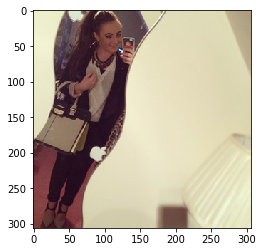

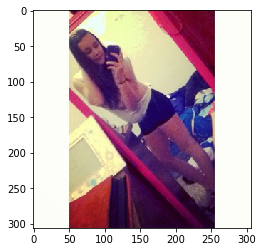

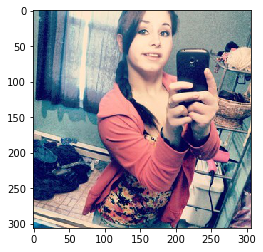

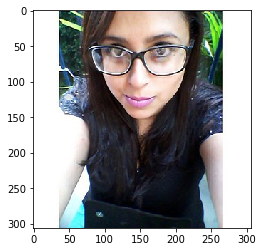

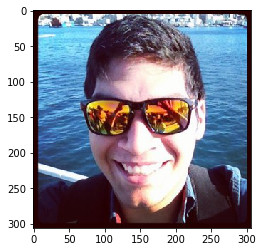

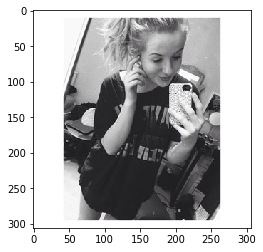

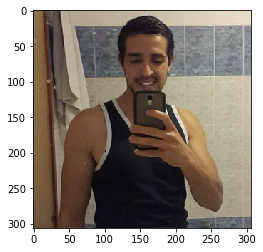

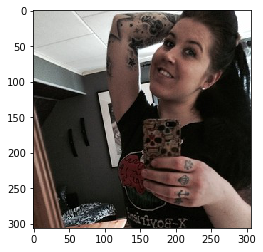

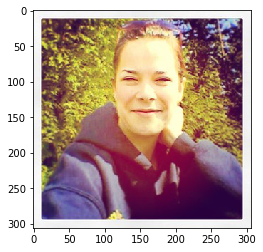

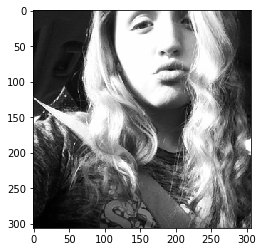

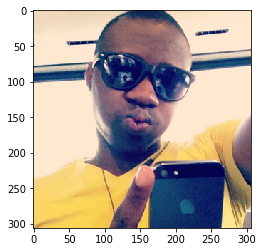

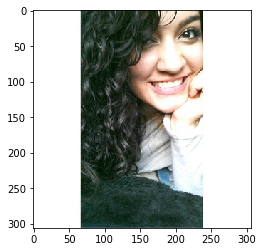

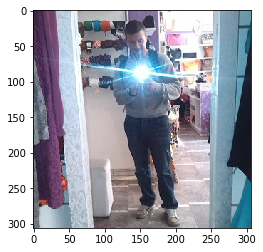

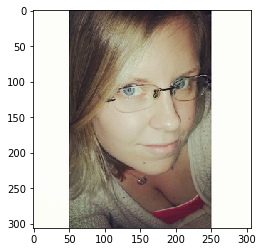

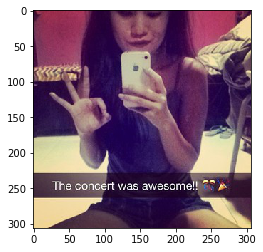

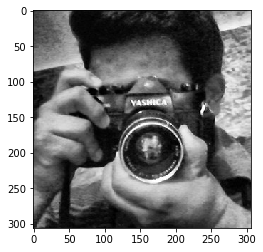

In [9]:
figure()
#gray()
#plt.plot(5,4,1)
plt.imshow(im[:,:,::-1])
axis('on')
for i, ID in enumerate(rank_ID[0][0:16]):
    img = Image.open(image_paths[ID])
    #img1 = img.resize((1000,1000))
    #gray()
    #plt.plot(5,4,i+5)
    plt.figure()
    plt.imshow(img)
    axis('on')
show()  